[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ASamarkRoth/Machine-Learning-Project-ECT-Talent/master?urlpath=lab)

**Author**: Anton Såmark-Roth <br>
Mail: <a href="mailto:anton.samark-roth@nuclear.lu.se">anton.samark-roth@nuclear.lu.se</a>

# Report - AT-TPC project
A project in the "Machine Learning and Data Analysis for Nuclear Physics, a Nuclear TALENT" Course at the ECT*, June 22 to July 3 2020 ([https://github.com/NuclearTalent/MachineLearningECT](https://github.com/NuclearTalent/MachineLearningECT)).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Report---AT-TPC-project" data-toc-modified-id="Report---AT-TPC-project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Report - AT-TPC project</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Data-Format" data-toc-modified-id="Data-Format-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Format</a></span></li><li><span><a href="#Visualisations" data-toc-modified-id="Visualisations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualisations</a></span></li><li><span><a href="#Logarithmic-scaling-of-the-charge-deposition" data-toc-modified-id="Logarithmic-scaling-of-the-charge-deposition-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Logarithmic scaling of the charge deposition</a></span></li><li><span><a href="#Parameter-distributions" data-toc-modified-id="Parameter-distributions-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Parameter distributions</a></span></li><li><span><a href="#Take-aways" data-toc-modified-id="Take-aways-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Take-aways</a></span></li></ul></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Voxel-discretization" data-toc-modified-id="Voxel-discretization-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Voxel discretization</a></span></li><li><span><a href="#Pixel-discretization" data-toc-modified-id="Pixel-discretization-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Pixel discretization</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Normalization</a></span></li><li><span><a href="#Generating-data-sets" data-toc-modified-id="Generating-data-sets-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Generating data sets</a></span></li></ul></li><li><span><a href="#Models-and-training" data-toc-modified-id="Models-and-training-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Models and training</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#FCNN" data-toc-modified-id="FCNN-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>FCNN</a></span></li><li><span><a href="#CNN" data-toc-modified-id="CNN-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>CNN</a></span></li></ul></li><li><span><a href="#Results---Model-evaluations" data-toc-modified-id="Results---Model-evaluations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Results - Model evaluations</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#FCNN" data-toc-modified-id="FCNN-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>FCNN</a></span></li><li><span><a href="#CNN" data-toc-modified-id="CNN-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>CNN</a></span></li></ul></li><li><span><a href="#Concluding-remarks" data-toc-modified-id="Concluding-remarks-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Concluding remarks</a></span></li></ul></div>

# Introduction

A typical issue in contemporary subatomic physics experiments is the writing of a large amount of junk data, i.e. data that is irrelevant, to disk. This is the case for active target experiments at the Active-Target Time Projection Chamber (_AT-TPC_) at the National Superconducting Cyclotron Laboratory in East Lansing, Michigan, USA. 

In this project, machine learning methods are investigated to classify whether data is "beam" (the junk), or "reaction" (the interesting), in simulated $^{22}$Mg+$\alpha$ data. Implemented in a future $^{22}$Mg+$\alpha$-experiment (or experiments with similar reactions) as a "software trigger", only interesting events in the AT-TPC detector may be written to disk.

This study builds from the previous work in Ref. ([Kuchera, 2019](https://www.sciencedirect.com/science/article/pii/S0168900219308046?via%3Dihub)) and this github repository is a fork of the code associated to the paper which may be found here: [https://github.com/ATTPC/event-classification](https://github.com/ATTPC/event-classification). 

In Ref. ([Kuchera, 2019](https://www.sciencedirect.com/science/article/pii/S0168900219308046?via%3Dihub)), machine learning methods were evaluated to classify proton-scattering events in the $^{46}$Ar(p,p) reaction in the AT-TPC detector. Logistic regression, fully-connected neural network and convolutional neural network models were investigated on simulated and experimental data discretized into voxels and images. 

In the current work, the following binary-classification models will be explored on the simulated $^{22}$Mg+$\alpha$ data:

* _Logistic regression_ on discretized data into voxels
* Single-layer Fully-Connected Neural Network, denoted _FCNN_, on discretized data into voxels
* A Convolutional Neural Network, denoted _CNN_, architecture based on the pre-trained `VGG16` ([Simonyan, 2014](https://arxiv.org/abs/1409.1556)) network in a _transfer-learning_ approach on discretized data into images.

The model building and data preprocessing are backed up with a thorough exploration of the data in section [Data exploration](#data-exploration). The steps taken to process the data, e.g. discretizations and generating data sets, such that it may be presented to the models, are reported in the next section, [Data preprocessing](#data-preprocessing). In section [Models and training](#models-and-training), the reader is linked to other notebooks where the model building is detailed and the training of the models is documented. Following, in section [Results - Model evaluations](#results---model-evaluations), the trained models are evaluated based on test data sets. The results are discussed and the report is concluded in section [Concluding remarks](#concluding-remarks).

Throughout the current report, the reader is assumed to be familiar with machine learning methods.

The work may be **fully reproduced** by running it via the binder link provided below. That said, the reader does not need to execute anything as the code cell outputs have been saved. Furthermore, train and test data as well as trained models have been saved and do not need to be regenerated in order to run all cells in the current notebook. 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ASamarkRoth/Machine-Learning-Project-ECT-Talent/master?urlpath=lab)

# Data exploration

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import h5py
import re
import pandas as pd

Load code

In [2]:
import data_processing.data as dp
%load_ext autoreload
%autoreload 1
%aimport data_processing.data

In [3]:
%matplotlib inline

## Data Format

The data used in the current work may be found in the file [data_processing/data/Mg22_alphaalpha_digiSim.h5](data_processing/data/Mg22_alphaalpha_digiSim.h5). It contains 2000 simulated events where odd numbers are "reaction" events, while even numbers are "beam" events. Each event is comprised by a point cloud of hits where every hit is a deposited charge onto a detector pad at a certain time. Thanks to a preprocessing step, all hits may be represented with 4-tuple $(x,y,z,A)$ where:

* $x$ and $y$ is the spatial position of the hit pad on the detector plane
* $z$ is the coordinate along the beam axis
* $A$ is the charge deposited on the pad

The data for one event is printed in the cell below. For the current study, the parameters **t** and **trackID** are not used. The number of hits part of an event varies from 10s to 100s.

In [43]:
filename = 'data_processing/data/Mg22_alphaalpha_digiSim.h5'
hf = h5py.File(filename, "r")

In [5]:
event_i = 1
event = hf["Event_[{}]".format(event_i)][:]
print("Event_[{}]".format(event_i), ":")
display(pd.DataFrame(event))

Event_[1] :


,x,y,z,t,A,trackID
0,-250.320007,-14.338187,382.0,191,13.110245,0
1,-245.411774,-5.836875,386.0,193,10.230814,0
2,-245.411774,-11.368951,388.0,194,887.402254,0
3,-240.503540,-14.338187,400.0,200,810.526412,0
4,-240.503540,-19.870264,406.0,203,17.065245,0
...,...,...,...,...,...,...
190,-7.362365,-1.450752,812.0,406,4.208486,0
191,-0.000013,-5.701409,812.0,406,110.864579,0
192,-0.000013,-2.799905,812.0,406,31.934587,0
193,-2.454130,-1.450752,814.0,407,1922.614551,0


Length of events

In [6]:
length = []
for key in hf.keys():
    length.append(len(hf[key]))
length = np.asarray(length)

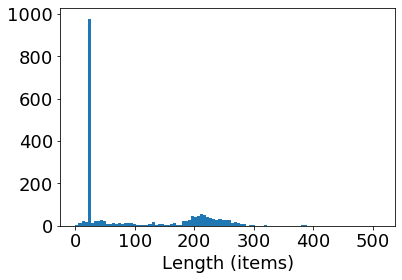

In [7]:
mpl.rcParams['font.size'] = 18
plt.figure()
plt.hist(length, bins=100)
plt.xlabel("Length (items)")
plt.show()

## Visualisations

The data of main interest to this study is four dimensional, $(x,y,z,A)$. Let's first investigate the full 4D-structure of a beam- and a reaction-labelled event:

In [8]:
event_i = 4
event_j = event_i+1

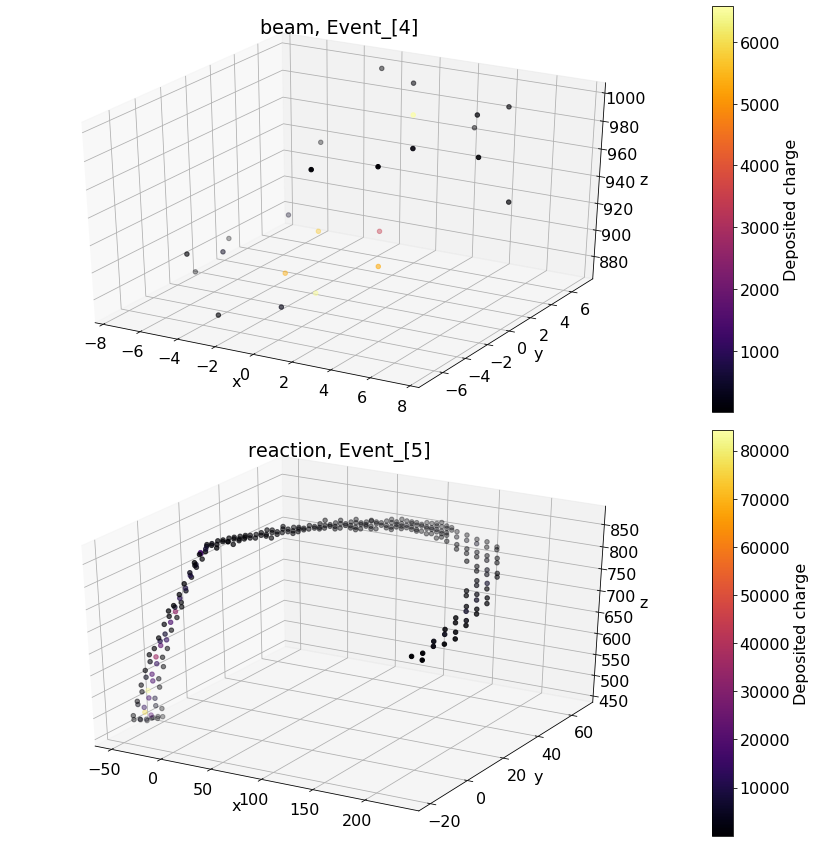

In [9]:
mpl.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(211, projection='3d')
sc = ax.scatter(dp.get_event_by_index(hf, event_i)["x"], dp.get_event_by_index(hf, event_i)["y"], dp.get_event_by_index(hf, event_i)["z"], c=dp.get_event_by_index(hf, event_i)["A"], cmap='inferno')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("{}, {}".format(dp.get_label_name(dp.get_key_from_index(event_i)), dp.get_key_from_index(event_i)))
plt.colorbar(sc, ax=ax, label='Deposited charge')

ax = fig.add_subplot(212, projection='3d')
sc = ax.scatter(dp.get_event_by_index(hf, event_j)["x"], dp.get_event_by_index(hf, event_j)["y"], dp.get_event_by_index(hf, event_j)["z"], c=dp.get_event_by_index(hf, event_j)["A"], cmap='inferno')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
#ax.set_xlim(0, gv.X_DISC)
#ax.set_ylim(0, gv.Y_DISC)
#ax.set_zlim(0, gv.Z_DISC)
ax.set_title("{}, {}".format(dp.get_label_name(dp.get_key_from_index(event_j)), dp.get_key_from_index(event_j)))
plt.colorbar(sc, ax=ax, label='Deposited charge')

plt.tight_layout()
plt.show()

Visualizing several pairs of events will show beam and reaction events in general having a significantly different spatial charge distribution. Before narrowing down on the features, the events are also visualised in images. 

The events may be visualized in images with projections to e.g. the $xy$ plane, where the deposited charge ($A$) is represented by the pixel color. Such images for 16 different events are presented in the figure below (choose which projection in the following code cell). The reaction events tend to have long continuous tracks while the beam events have two $z$ components while being centered around $(x,y)=(0,0)$.

In [44]:
projection = 'xy' # 'xy', 'xz', 'zy'

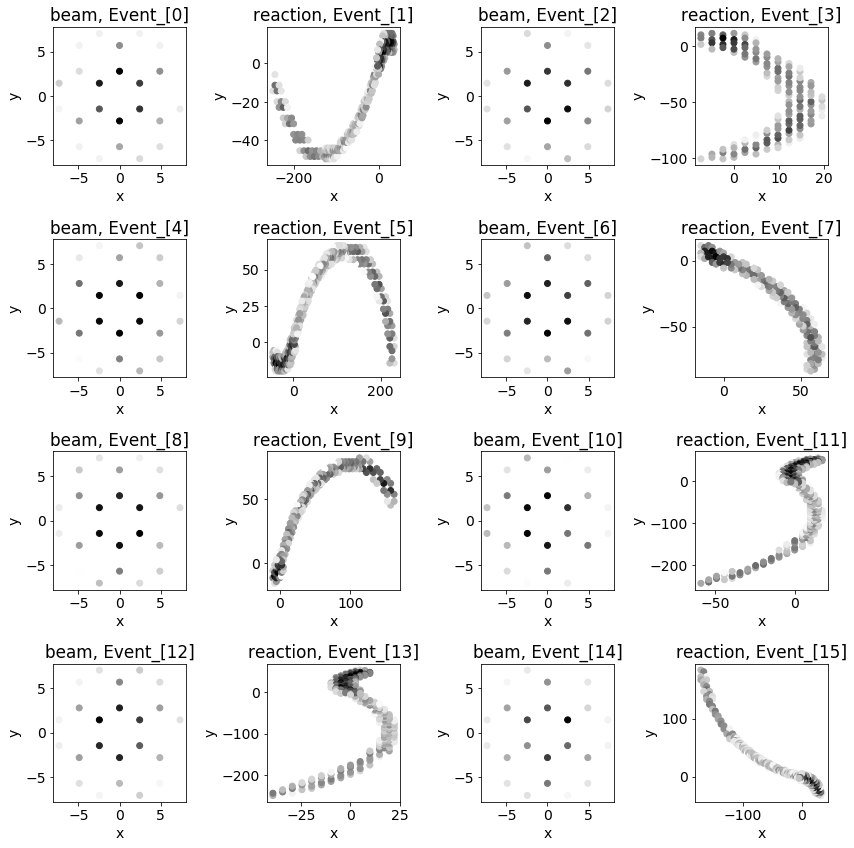

In [45]:
mpl.rcParams['font.size'] = 14

n_rows, n_cols = 4, 4

on_x = None
on_y = None

if projection == 'xy':
    on_x, on_y = "x", "y"
elif projection == 'xz':
    on_x, on_y = "x", "z"
elif projection == 'zy':
    on_x, on_y = "z", "y"
else:
    print("Invalid projection:", projection)

fig = plt.figure(figsize=(12,12))

for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i+1)
    sc = plt.scatter(dp.get_event_by_index(hf, i)[on_x], dp.get_event_by_index(hf, i)[on_y], c=np.log(dp.get_event_by_index(hf, i)["A"]), cmap='Greys')
    ax.set_xlabel(on_x)
    ax.set_ylabel(on_y)
    ax.set_title("{}, {}".format(dp.get_label_name(dp.get_key_from_index(i)), dp.get_key_from_index(i)))
    #plt.xlim(-275.0, 275.0)
    #plt.ylim((-275.0, 275.0))
    #ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

## Logarithmic scaling of the charge deposition

For eventual further processing of the image data in machine learning models, it is wise to use a grey color map. Doing so will render parts of the detected track in the event invisible (or close to) using a linear scale, see left panel in the figure below. In this case, important features will be missing or largely suppressed. This motivates a transformation of the deposited charge to logarithmic scale, see right panel of figure below (already used for the figure above). 

In [12]:
event_i = 5

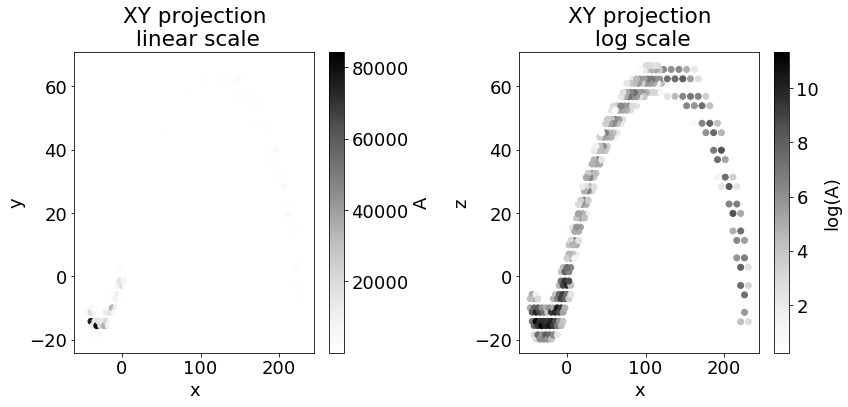

In [13]:
mpl.rcParams['font.size'] = 18

fig = plt.figure(figsize=(18,6))
ax = plt.subplot(131)
sc = plt.scatter(dp.get_event_by_index(hf, event_i)["x"], dp.get_event_by_index(hf, event_i)["y"], c=dp.get_event_by_index(hf, event_i)["A"], cmap='Greys')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("XY projection\n linear scale")
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', label='A')    

ax = plt.subplot(132)
sc = plt.scatter(dp.get_event_by_index(hf, event_i)["x"], dp.get_event_by_index(hf, event_i)["y"], c=np.log(dp.get_event_by_index(hf, event_i)["A"]), cmap='Greys')
ax.set_xlabel("x")
ax.set_ylabel("z")
ax.set_title("XY projection\n log scale")
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', label='log(A)')    

plt.tight_layout()
plt.show()

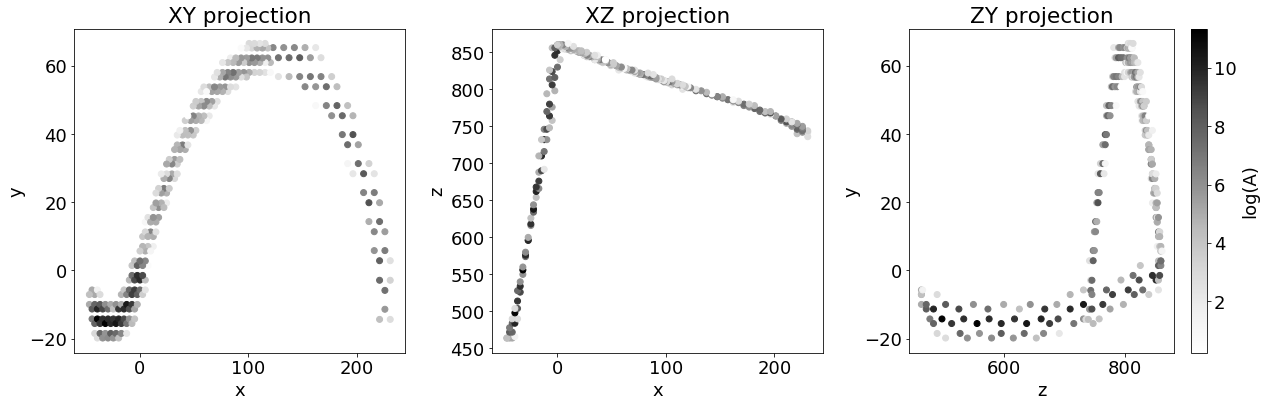

In [47]:
mpl.rcParams['font.size'] = 18

event_i = 5

fig = plt.figure(figsize=(18,6))
ax = plt.subplot(131)
sc = plt.scatter(dp.get_event_by_index(hf, event_i)["x"], dp.get_event_by_index(hf, event_i)["y"], c=np.log(dp.get_event_by_index(hf, event_i)["A"]), cmap='Greys')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("XY projection")

ax = plt.subplot(132)
sc = plt.scatter(dp.get_event_by_index(hf, event_i)["x"], dp.get_event_by_index(hf, event_i)["z"], c=np.log(dp.get_event_by_index(hf, event_i)["A"]), cmap='Greys')
ax.set_xlabel("x")
ax.set_ylabel("z")
ax.set_title("XZ projection")

ax = plt.subplot(133)
sc = plt.scatter(dp.get_event_by_index(hf, event_i)["z"], dp.get_event_by_index(hf, event_i)["y"], c=np.log(dp.get_event_by_index(hf, event_i)["A"]), cmap='Greys')
ax.set_xlabel("z")
ax.set_ylabel("y")
ax.set_title("ZY projection")

cbar = fig.colorbar(sc, orientation='vertical', label='log(A)')    

plt.tight_layout()
plt.show()

## Parameter distributions

Important features to discriminate beam from reaction events have already been determined from the visualisations above. For a complete overview of the data set, the mean of $(x,y,z)$ as well as the sum of the deposited charge ($A$) for each event are calculated. Distributions and correlations of the parameters are then investigated in the pair plot below.

The following observations are made:

* Beam events are strikingly centered about $(x,y) = (0,0)$, while reaction events are wildly scattered across the $xy$ plane. The standard deviation of each coordinate (see output of next hidden cell) further shows this.
* Reaction events tend to assume smaller $z$-values and generally deposit a larger energy ($A$) for each event.

In [15]:
cols = ["Event", "Label", "length", 
        "x_mean", "y_mean", "z_mean", "A_sum",
        "x_std", "y_std", "z_std",
       ]
df = pd.DataFrame(columns=cols)
for i, key in enumerate(hf.keys()):
#for i, key in enumerate(sorted(dict_data)):
    #if i > 3:
    #    break
    #print(i, key)
    #print(pd.DataFrame(hf[key][:]))
    d = pd.DataFrame(hf[key][:])
    means = np.mean(d, axis=0)
    sums = np.sum(d, axis=0)
    std_devs = np.std(d, axis=0)

    #print(means)
    df = df.append({"Event": dp.get_event_from_key(key), "Label": dp.get_label_name(key), "length": d.shape[0], 
                    "x_mean": means["x"], "y_mean": means["y"], "z_mean": means["z"], "A_sum": sums["A"],
                    "x_std": std_devs["x"], "y_std": std_devs["y"], "z_std": std_devs["z"],
                   }, ignore_index=True)
df = df.sort_values("Event")
display(df.head())

,Event,Label,length,x_mean,y_mean,z_mean,A_sum,x_std,y_std,z_std
0,0,beam,24,-0.000003,0.000000,961.083333,41292.864135,4.367145,4.367266,54.601524
1111,1,reaction,195,-66.034644,-20.416205,661.897436,322786.822798,79.081301,21.596434,111.789866
1222,2,beam,24,-0.000003,0.000000,877.083333,89094.206758,4.367145,4.367266,154.718001
1333,3,reaction,124,7.837347,-44.973050,529.016129,168967.813590,7.145945,34.599390,25.280996
1444,4,beam,24,-0.000003,0.000000,938.916667,34598.337410,4.367145,4.367266,49.325379


In [16]:
import seaborn as sns
sns.set(context='notebook', style='darkgrid', palette='deep', font_scale=2., color_codes=True, rc=None)

/home/anton/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/anton/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


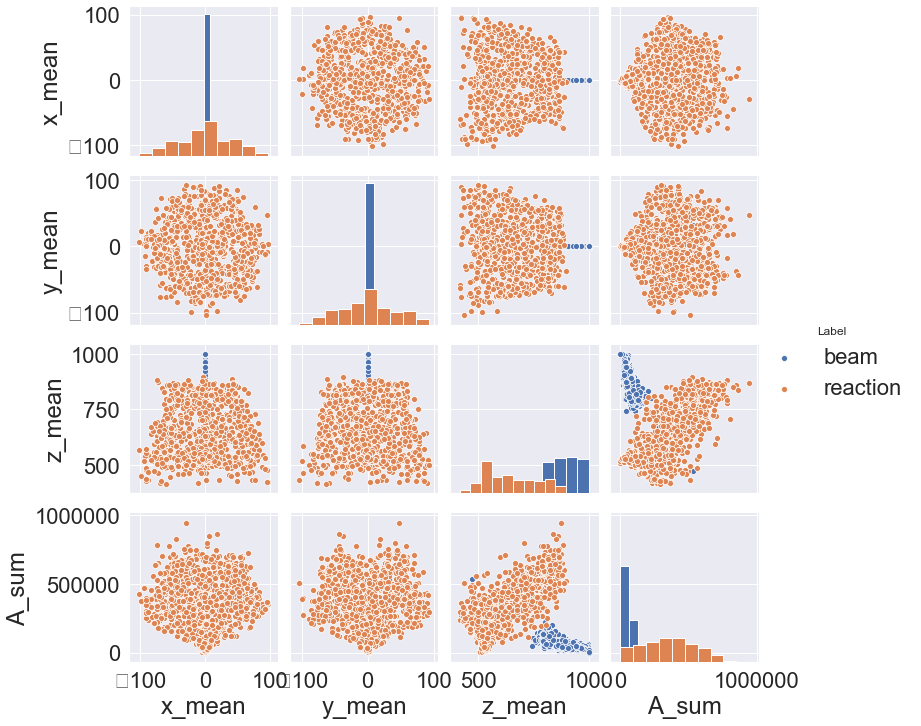

In [17]:
mpl.rcParams['font.size'] = 18
sns.pairplot(df, hue="Label", vars=["x_mean", "y_mean", "z_mean", "A_sum"], kind='scatter', diag_kind='hist');
plt.show()

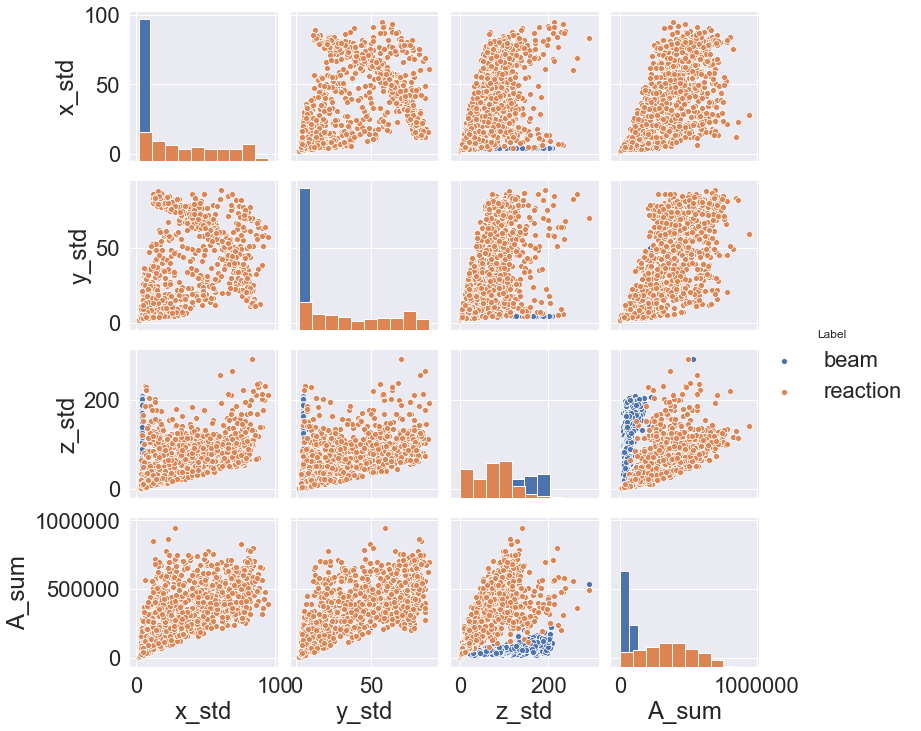

In [18]:
sns.pairplot(df, hue="Label", vars=["x_std", "y_std", "z_std", "A_sum"], kind='scatter', diag_kind='hist');
plt.show()
sns.reset_orig()

## Take-aways

All $(x,y,z,A)$ parameters show features which could enable a distinction between beam and reaction events. I.e. all parameters could be part of the input features provided to the machine learning models. 

Concerning the image representation of the event data, it is not clear whether one projection should be preferred over the others.   

# Data preprocessing
_Or how to present the data to the models_

Logistic regression and neural network models require the input-feature data to have fixed length. The AT-TPC detector enables a resolution of over 5 million voxels across its volume. Having each event being represented with a feature vector of such length is not feasible, therefore the resolution is decreased considerably through two discretization procedures. The event data is either discretized into voxels or pixels.

## Voxel discretization

Voxels are provided as the input data to the logistic regression and the fully-connected neural network models. Each dimension of the detector is divided into 20 sub parts creating in total $20\times20\times20=8000$ voxels. In this process, the `log10` of the deposited charge on each pad is summed within the volume of each voxel. The input data is a 1D vector of length 8000.

**See also**: [data_processing/generate_voxels.py](./data_processing/generate_voxels.py)

Below the discretization process, i.e. converting raw data to voxels, is illustrated for one event.

In [19]:
import data_processing.generate_voxels as gv
%aimport data_processing.generate_voxels

In [20]:
event_i = 7

In [21]:
#discretize voxels
xyzs = gv.discretize_grid_charge(dp.get_event_by_index(hf, event_i), 20, 20, 20)
voxels = xyzs.toarray()

#from voxel to (x,y,z) coordinate
mask = voxels[0] > 0
bucket_num = np.array(range(len(voxels[0])))[mask]
x, y, z = gv.get_xyz_from_bucket(bucket_num, 20, 20, 20)

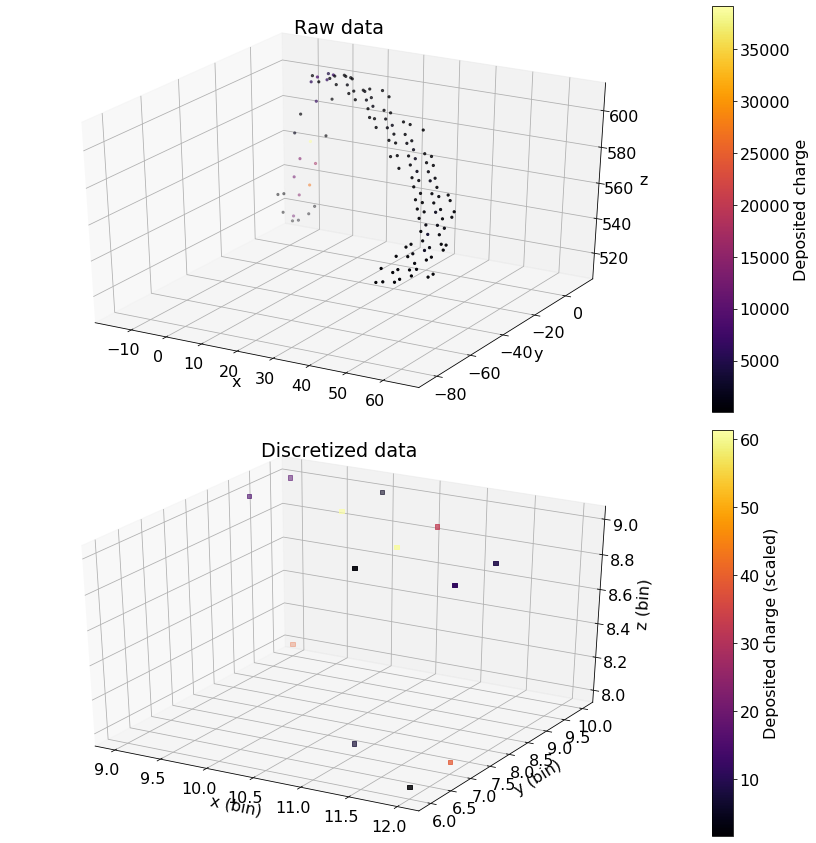

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

mpl.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(211, projection='3d')
sc = ax.scatter(dp.get_event_by_index(hf, event_i)["x"], dp.get_event_by_index(hf, event_i)["y"], dp.get_event_by_index(hf, event_i)["z"], c=dp.get_event_by_index(hf, event_i)["A"], cmap='inferno', marker='.')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Raw data")
plt.colorbar(sc, ax=ax, label='Deposited charge')

ax = fig.add_subplot(212, projection='3d')
sc = ax.scatter(x, y, z, c=voxels[0][mask], cmap='inferno', marker='s')
ax.set_xlabel("x (bin)")
ax.set_ylabel("y (bin)")
ax.set_zlabel("z (bin)")
ax.set_title("Discretized data")
plt.colorbar(sc, ax=ax, label='Deposited charge (scaled)')

plt.tight_layout()
plt.show()

## Pixel discretization

The input data for the CNN model expects a format of images. These images are generated by first performing a `log10` scaling and normalizing with respect to a maximum charge, determined based on the full training data set, of the deposited charge on each pad. The projection of the raw data is plotted in a scatterplot with dimensions being that of the AT-TPC detector where the figure size is $1''\times1''$ and has a `dpi=48` (dots per inch). The figure is rendered using the matplotlib canvas renderer into a $48\times48$ pixel image.

**See also**: [data_processing/generate_images.py](./data_processing/generate_images.py)

Below the discretization process, i.e. converting raw data to images, is illustrated for one event.

In [23]:
import data_processing.generate_images as gi
%aimport data_processing.generate_images

In [24]:
event_i = 1

In [25]:
data = [[np.asarray(pd.DataFrame(dp.get_event_by_index(hf, event_i))), dp.get_label(dp.get_key_from_index(event_i))]]

#print("Shape:\n\tdata:", len(data))
data, max_charge = gi.transform_data(data)

features, targets = gi.make_image_features_targets(data, 'xy', 48)

Transform, shuffle and scale data ...
Make image features and targets ...


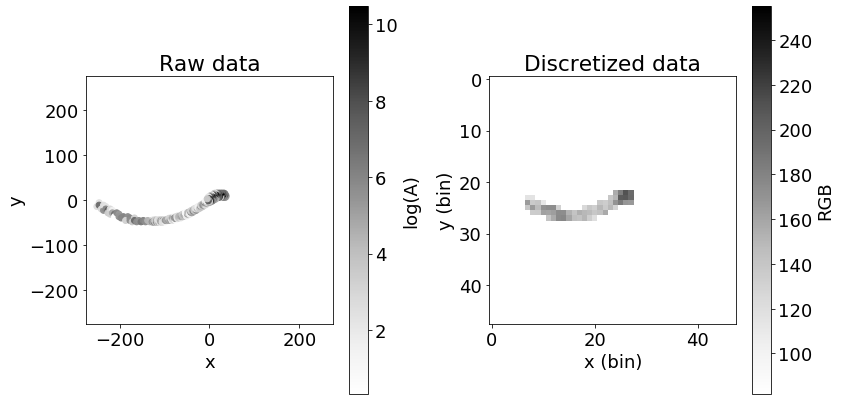

In [26]:
%matplotlib inline
mpl.rcParams['font.size'] = 18

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1,2,1)
sc = plt.scatter(dp.get_event_by_index(hf, event_i)["x"], dp.get_event_by_index(hf, event_i)["y"], c=np.log(dp.get_event_by_index(hf, event_i)["A"]), cmap='Greys', )
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Raw data")
plt.xlim(-275.0, 275.0)
plt.ylim((-275.0, 275.0))
cbar = fig.colorbar(sc, orientation='vertical', label='log(A)')
ax.set_aspect('equal', adjustable='box')

ax = fig.add_subplot(1,2,2)
im = ax.imshow(features[0], cmap='Greys')
ax.set_xlabel("x (bin)")
ax.set_ylabel("y (bin)")
ax.set_title("Discretized data")
plt.colorbar(im, ax=ax, label="RGB")

plt.tight_layout()
plt.show()

## Normalization

The generated voxel data, which provides the input features to the logistic regression and the fully-connected neural network models, are normalized by the Euclidean norm with `sklearn.preprocessing.Normalizer`. As the `VGG16` pre-trained network uses RGB images as input, no normalization is applied to the images which are the input to the convolutional neural network model.

## Generating data sets

Train (0.8) and test (0.2) data sets were generated and written to disk, to be loaded during the later training and testing.

(they are included in the repo and need not to be regenerated)

**See also**: [GenerateDataSets.ipynb](./GenerateDataSets.ipynb)

# Models and training

The model building and training are done in separate notebooks to which the links are provided below. The strategy in the training of the neural networks are detailed in the respective notebook while it is monitored with the `TensorBoard` utility.

Note that final trained models have been saved and need not to be regenerated to run the cells in the following sections.

## Logistic regression

**See**: [LogisticTraining.ipynb](./LogisticTraining.ipynb)

## FCNN


**See**: [FCNNTraining.ipynb](./FCNNTraining.ipynb)

## CNN

**See**: 

* [CNNTrainingColab.ipynb](./CNNTrainingColab.ipynb) 
* <a href="https://colab.research.google.com/github/ASamarkRoth/Machine-Learning-Project-ECT-Talent/blob/master/CNNTrainingColab.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> (recommended)
    * under `Runtime` configure `Change runtime type` to `GPU` 

# Results - Model evaluations

In this section the trained models are loaded and evaluated on the test data. Classification reports are presented along with brief comment to the results.

In [27]:
import fcnn.eval
import cnn.eval
import logistic.eval
import data_processing.data

Loading test data

In [28]:
data_dir = "./data_processing/voxels/"
# Load data
_, test_voxels = data_processing.data.load_discretized_data(data_dir, prefix='Grid20', binary=True)

Loading discretized data from: ./data_processing/voxels/Grid20voxels.h5


In [29]:
path_data = './data_processing/images/xyimages.h5'
_, test_images = data_processing.data.load_image_h5(path_data, categorical=False, binary=True, reverse_labels=False)

Loading images from file: ./data_processing/images/xyimages.h5
	Number of categories: 2


## Logistic regression

The classification report along with the confusion matrix of the logistic regression model with $l^1$ regularization based on the test data can be found below:


Classification Report for: LogisticCVRegression

Accuracy: 0.9899749373433584

              precision    recall  f1-score   support

        beam       0.99      1.00      0.99       202
    reaction       0.99      0.98      0.99       197

    accuracy                           0.99       399
   macro avg       0.99      0.99      0.99       399
weighted avg       0.99      0.99      0.99       399



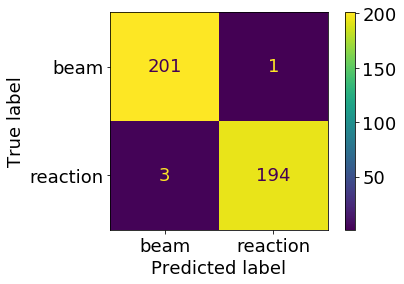

In [30]:
logistic.eval.eval(model_file='logistic/logs/logistic_cv_model.pkl', data=test_voxels, name="LogisticCVRegression", examples_limit=-1)

The logistic regression model performs really well with classification metrics really close to ideal. This provides a baseline for the rest of the models.

## FCNN

The classification report along with the confusion matrix of the fully-connected neural network based on the test data can be found below:

13/13 [==============================] - 0s 6ms/step - loss: 0.0355 - accuracy: 0.9925


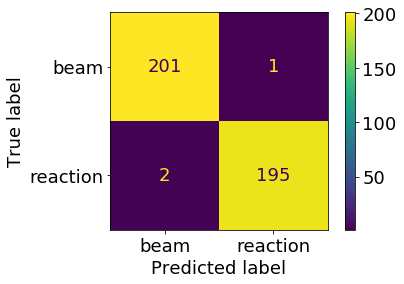


Classification Report for: FCNN

Loss: 0.035459693521261215, Accuracy: 0.9924812316894531

              precision    recall  f1-score   support

        beam       0.99      1.00      0.99       202
    reaction       0.99      0.99      0.99       197

    accuracy                           0.99       399
   macro avg       0.99      0.99      0.99       399
weighted avg       0.99      0.99      0.99       399



In [31]:
fcnn.eval.eval(model_file='fcnn/logs/nodes128_dropoutTrue_lr0.001_decay0.0_samples-1_final_saved_model.h5', data=test_voxels, name='FCNN')

The FCNN model performs basically just as well as the logistic regression model.

## CNN

The classification report along with the confusion matrix of the CNN trained on $xy$ projected images on the test data can be found below:

13/13 [==============================] - 10s 797ms/step - loss: 0.1197 - accuracy: 0.9649


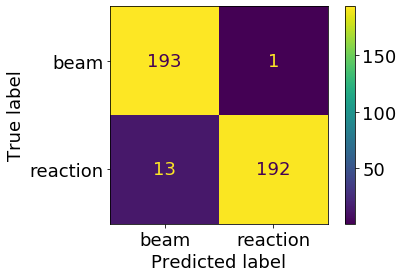


Classification Report for: CNN

Loss: 0.11965702474117279, Accuracy: 0.9649122953414917

              precision    recall  f1-score   support

        beam       0.94      0.99      0.97       194
    reaction       0.99      0.94      0.96       205

    accuracy                           0.96       399
   macro avg       0.97      0.97      0.96       399
weighted avg       0.97      0.96      0.96       399



In [42]:
cnn.eval.eval(model_file='cnn/logs/CNN_xy_freezeFalse_dropoutTrue_lr1e-05_decay0.0_samples-1_saved_model.h5', data=test_images, name='CNN')

The CNN model performs slightly worse than the logistic regression and the FCNN in all performance metrics.

# Concluding remarks

Comparing the performance on the test data set, all metrics for the logistic regression and the FCNN models are comparable while the CNN model performs slightly worse. Based on these results, the logistic regression model would be the one to be implemented and used as it is the simplest while it simultaneously performs the best. However, one should not haste into drawing too many conclusions from these results without conducting further studies. A natural next step would be to extend the training or testing of the models to experimental data. 

How well an implemented model performs under experimental conditions, is a consideration that should be taken into account in future work. E.g. is, computational performance, memory usage, and/or an easy and efficient implementation, important in the experiment? Furthermore, experiments are likely dominated by beam events while the precious reaction events probably occur considerably less frequently. Therefore, it may be crucial to not classify true reaction events as beam events and throw these away. For the models and data investigated in the present study, this seems not to be a big problem. For the test data set, there is only one such event for all models (top right box in the confusion matrices).   

**Final conclusion**: In future investigations of the AT-TPC, this work would recommend to discretize the data into voxels and primarily consider a logistic regression model to discriminate between beam and reaction events in $^{22}$Mg+$\alpha$-like reaction studies.